# Chpater 02 - Perceptron

In [54]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris


## Load Iris Data

In [55]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width',
              'petal length', 'petal width', 'label']
df


,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Data Information Extraction

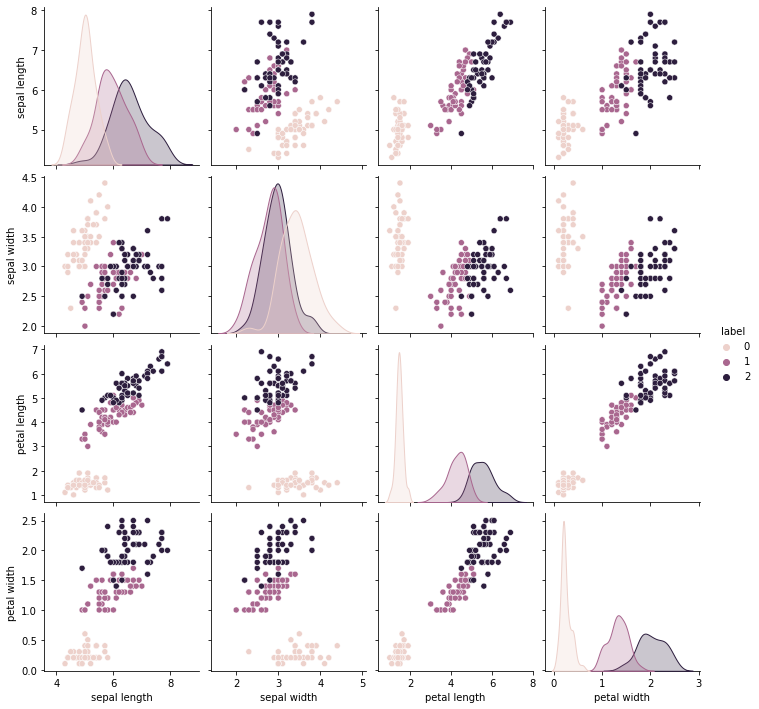

In [18]:
sns.pairplot(vars=['sepal length', 'sepal width',
             'petal length', 'petal width'], data=df, hue="label")


### Select Required Data

In [56]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:, :-1], data[:, -1]
y = np.array([1 if i == 1 else -1 for i in y])


## Perceptron Algorithm

![2.1](../images/algorithm/2.1.png)

In [49]:
class Perceptron:
    def __init__(self, data, lr=0.01):
        self.data = data
        self.w = np.zeros(shape=data.shape[1] - 1)  # ignore label column
        self.b = 0
        self.lr = lr

    def sign(self, x):
        return 1 if x > 0 else -1

    def fit(self, features, labels, verbose=False):
        while True:
            flag = False
            for x, y in zip(features, labels):
                if y*(np.dot(x, self.w)+self.b) <= 0:
                    self.w += self.lr * y * x
                    self.b += self.lr * y
                    if verbose:
                        print('x: {}, y: {}, w: {}, b: {}'.format(
                            x, y, self.w, self.b))
                    flag = True
                if flag:
                    break
            if flag:
                continue
            break

    def predict(self, features):
        return self.sign(np.dot(features, self.w)+self.b)

    def score(self, features, labels):
        pass

    def get_w(self):
        return self.w

    def get_b(self):
        return self.b

    def __str__(self):
        return 'w: {}, b: {}'.format(self.w, self.b)


### Predict

In [50]:
Model = Perceptron(data, 1)
Model.fit(X, y)
w, b = Model.get_w(), Model.get_b()
print(Model)


w: [  78.2 -100.4], b: -121


<AxesSubplot:>

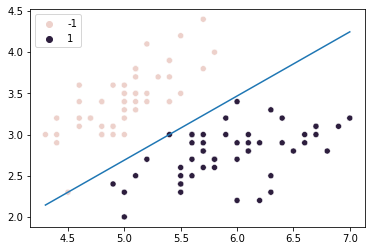

In [51]:
x_points = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 10)
y_ = -(w[0] * x_points + b) / w[1]
sns.lineplot(x=x_points, y=y_)
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue=y)


## Perceptron Algorithm - Dual Form

![2.2](../images/algorithm/2.2.png)

In [ ]:
class PerceptronDuality:
    def __init__(self, data, lr=0.01):
        self.data = data
        self.alpha = np.zeros(shape=data.shape[0])
        self.b = 0
        self.lr = lr

    def sign(self, x):
        return 1 if x > 0 else -1

    def fit(self, features, labels):
        G = features.dot(features.T)

        while True:
            flag = False
            for i in range(len(self.alpha)):
                if labels[i]*(np.sum(self.alpha*labels*G[:, i])+self.b) <= 0:
                    self.alpha[i] += self.lr
                    self.b += self.lr * labels[i]
                    flag = True
                if flag:
                    break
            if flag:
                continue
            break

    # def predict(self, features, labels):
        # return self.sign(np.sum(self.alpha*labels)+self.b)

    def score(self, features, labels):
        pass

    def get_alpha(self):
        return self.alpha

    def get_b(self):
        return self.b

    def __str__(self):
        return 'alpha: {}, b: {}'.format(self.alpha, self.b)


### Predict

In [ ]:
Model = PerceptronDuality(data, 1)
Model.fit(X, y)
alpha, b = Model.get_alpha(), Model.get_b()
print(Model)
